In [1]:
import networkx as nx
from inet import *

def inet_draw(inet):
    inet = nx.MultiDiGraph(inet)
    inet.remove_nodes_from(list(nx.isolates(inet)))
    nx.draw_networkx(inet,
                    labels={
                        n: ("" if inet.nodes[n]["bipartite"] == 0
                            else inet.nodes[n]["tag"]) for n in inet.nodes},
                    node_size=[
                        100 if is_active_wire(inet, n) else
                        10 if inet.nodes[n]["bipartite"] == 0
                        else 700 for n in inet.nodes],
                    node_color=[
                        "red" if is_active_wire(inet, n) else
                        "blue" if inet.nodes[n]["bipartite"] == 0
                        else "green" for n in inet.nodes],
                    connectionstyle=["arc3,rad=-0.00", "arc3,rad=0.3"],
                    )


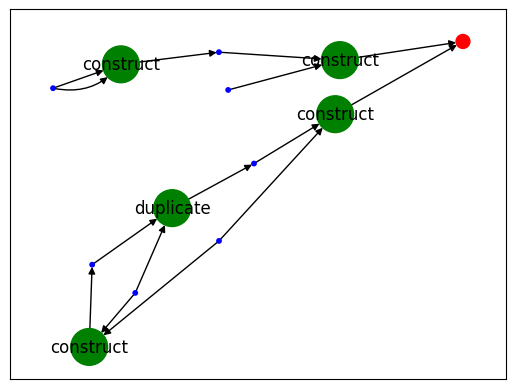

In [2]:
inet = nx.MultiDiGraph()
# https://zicklag.katharos.group/blog/interaction-nets-combinators-calculus/
# u = \x.x
u = inet_lambda_id(inet)
# v = \x.xx
d0 = inet_add_duplicate(inet)
c0 = inet_apply(inet, (d0, 1), (d0, 2))
v = inet_lambda(inet, (d0, 0), (c0, 2))
# uv
inet_apply(inet, (u, 0), (v, 0))
inet_draw(inet)

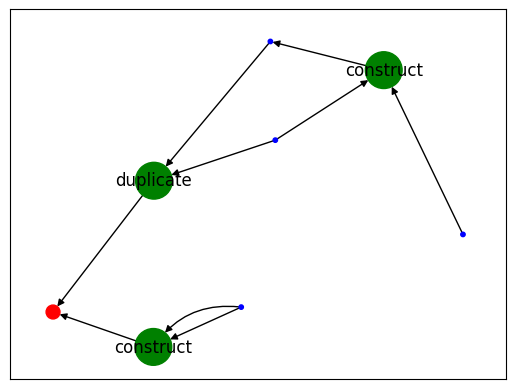

In [3]:
annihilate_concon_or_dupdup(inet)
inet_draw(inet)

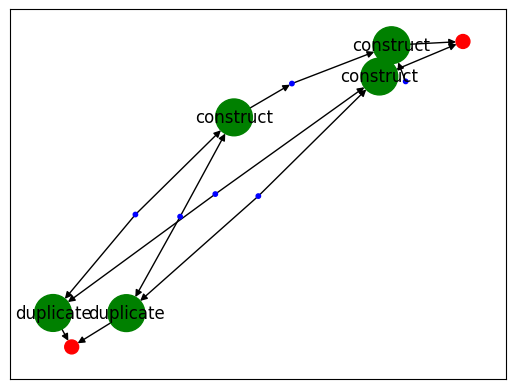

In [4]:
commute_construct_duplicate(inet)
inet_draw(inet)

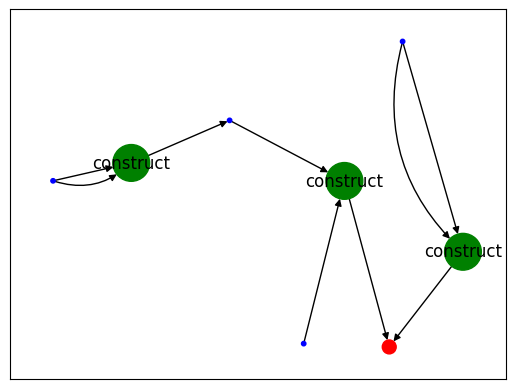

In [5]:
annihilate_concon_or_dupdup(inet)
inet_draw(inet)

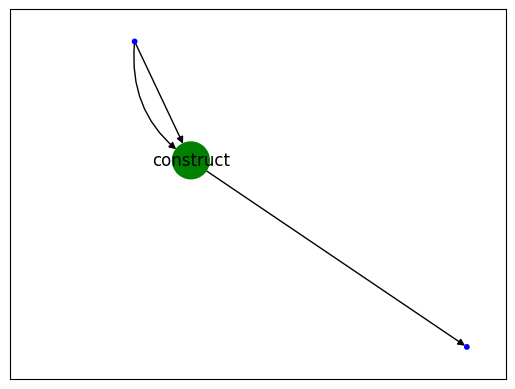

In [6]:
annihilate_concon_or_dupdup(inet)
inet_draw(inet)